In [1]:
# Here we import all the various library we need

import pandas as pd # data analysis and manipulation tool.
import numpy as np #  multi-dimensional arrays and matrices.
import re
import matplotlib.pyplot as plt #  interactive plots and simple cases of programmatic plot generation.

import keras # Keras is a deep learning API written in Python
from keras.layers import Flatten # reshapes the tensor to have a shape that is equal to the number of elements contained in the tensor
from keras.layers import Activation # used either for activation layers or augument.
from keras.layers import Dense # regular densely-connected NN layer.
from nltk.tokenize import TweetTokenizer # Tokenizers divide strings into lists of substrings.
from keras.preprocessing import sequence # transforms a list of sequences into a 2D Numpy array of shape. 
from keras.models import Sequential # for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from keras.layers import Dropout # randomly selected neurons are ignored during training
from keras.layers import Embedding # Turns positive integers into dense vectors of fixed size.
from keras.layers import LSTM  # Long Short-Term Memory layer
from keras.layers import Conv1D, MaxPooling1D # 1D convolution layer
from sklearn.feature_extraction.text import CountVectorizer # Convert a collection of text documents to a matrix of token counts
from keras.preprocessing.sequence import pad_sequences # Pads sequences to the same length.
from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets.
from keras.utils.np_utils import to_categorical # Converts a class vector (integers) to binary class matrix.
from keras.callbacks import EarlyStopping # Stop training when a monitored metric has stopped improving.
from keras.callbacks import ModelCheckpoint # Callback to save the Keras model or model weights at some frequency.
from keras.models import model_from_json # Parses a JSON model configuration string and returns a model instance.
from tensorflow.keras.optimizers import SGD # Gradient descent (with momentum) optimizer.
from sklearn.metrics import confusion_matrix # Compute confusion matrix to evaluate the accuracy of a classification.
from sklearn import metrics # Accuracy classification score.
from keras.preprocessing.text import Tokenizer # Text tokenization utility class.
import warnings # used to show warning message...
warnings.filterwarnings('ignore') #The warnings filter controls.


In [2]:
tweets_df = pd.read_csv('f-data.csv') # here we load our file to the workplace
tweets_df.head() # here we display all first 5 rows 

,Datetime,tweet,Sentiment
0,2020-03-25 06:36:25+00:00,"$DG #Dollar General #Options #maxpain Chart, O...",1
1,2020-03-25 06:18:32+00:00,“Education is not only a ladder of opportunity...,0
2,2020-03-25 06:05:46+00:00,$GCLT news coming soon #fintech #finance https...,0
3,2020-03-25 06:35:29+00:00,That amazing feeling when you finally close a ...,1
4,2020-03-25 06:15:49+00:00,From OHM to SHIB: 5 Most Impressive Altcoins o...,1


In [3]:
tweets_df.shape # here we check the shape of our file


(12524, 3)

In [4]:
tweets_df.drop_duplicates(subset = ['tweet'], inplace = True) # here we remove duplicate tweets...
tweets_df.head() #here we check the first five record of out tweet...


,Datetime,tweet,Sentiment
0,2020-03-25 06:36:25+00:00,"$DG #Dollar General #Options #maxpain Chart, O...",1
1,2020-03-25 06:18:32+00:00,“Education is not only a ladder of opportunity...,0
2,2020-03-25 06:05:46+00:00,$GCLT news coming soon #fintech #finance https...,0
3,2020-03-25 06:35:29+00:00,That amazing feeling when you finally close a ...,1
4,2020-03-25 06:15:49+00:00,From OHM to SHIB: 5 Most Impressive Altcoins o...,1


In [5]:
tweets_df.dropna(inplace = True) # here we remove null rows...
tweets_df.head()

,Datetime,tweet,Sentiment
0,2020-03-25 06:36:25+00:00,"$DG #Dollar General #Options #maxpain Chart, O...",1
1,2020-03-25 06:18:32+00:00,“Education is not only a ladder of opportunity...,0
2,2020-03-25 06:05:46+00:00,$GCLT news coming soon #fintech #finance https...,0
3,2020-03-25 06:35:29+00:00,That amazing feeling when you finally close a ...,1
4,2020-03-25 06:15:49+00:00,From OHM to SHIB: 5 Most Impressive Altcoins o...,1


In [6]:
tweets_df.shape

(12524, 3)

In [7]:
# here we clean our tweet
def TextClean(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'@[a-z0-9_]\S+', '', tweet)
    tweet = re.sub(r'#[a-z0-9_]\S+', '', tweet)
    tweet = re.sub(r'&[a-z0-9_]\S+', '', tweet)
    tweet = re.sub(r'[?!.+,;$%&"]+', '', tweet)
    tweet = re.sub(r'rt[\s]+', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = re.sub(r'\$', '', tweet)
    tweet = re.sub(r'rt+', '', tweet)
    tweet = re.sub(r'https?:?\/\/\S+', '', tweet)
    
    return tweet

In [8]:
tweets_df['Datetime'] = pd.to_datetime(tweets_df['Datetime'])
tweets_df.set_index('Datetime', inplace = True)
tweets_df.drop_duplicates(subset = ['tweet'], inplace = True)
tweets_df['CleanTweet'] = tweets_df['tweet'].apply(TextClean)
tweet_tokenizer = TweetTokenizer()
tweets_df['CleanTweet'] = tweets_df['CleanTweet'].apply(tweet_tokenizer.tokenize)
tweets_df['CleanTweet'] = [', '.join(map(str, token)) for token in tweets_df['CleanTweet']]
# tweets_df.to_csv('clean' + '.csv', encoding='utf-8')
tweets_df.head()

,tweet,Sentiment,CleanTweet
Datetime,,,
2020-03-25 06:36:25+00:00,"$DG #Dollar General #Options #maxpain Chart, O...",1,"dg, general, chaopen, interest, chaupdate"
2020-03-25 06:18:32+00:00,“Education is not only a ladder of opportunity...,0,"“, education, is, not, only, a, ladder, of, op..."
2020-03-25 06:05:46+00:00,$GCLT news coming soon #fintech #finance https...,0,"gclt, news, coming, soon"
2020-03-25 06:35:29+00:00,That amazing feeling when you finally close a ...,1,"that, amazing, feeling, when, you, finally, cl..."
2020-03-25 06:15:49+00:00,From OHM to SHIB: 5 Most Impressive Altcoins o...,1,"from, ohm, to, shib, :, most, impressive, altc..."


6559
1492
4473


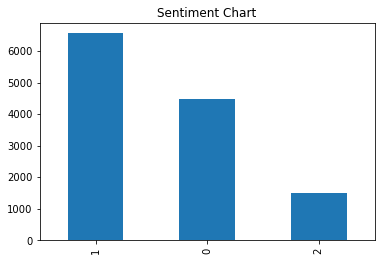

In [9]:
%matplotlib inline
tweets_df.Sentiment.value_counts().plot(kind='bar',title="Sentiment Chart")
print((tweets_df['Sentiment'].values == 1).sum())
print((tweets_df['Sentiment'].values == 2).sum())
print((tweets_df['Sentiment'].values == 0).sum())

In [10]:
# SVM
label=tweets_df[["Sentiment"]].values

features=tweets_df[["CleanTweet"]]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(analyzer="word",lowercase=True)
sentence_train_vector=vectorizer.fit_transform(tweets_df.iloc[:,0].astype(str))

features=sentence_train_vector

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.25,random_state=0)

from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
result=svc.predict(x_test)

from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,result)
print(cm)

from sklearn.metrics import accuracy_score,classification_report
accuracy=accuracy_score(y_test,result)
print(accuracy)

print(classification_report(y_test,result))

[[ 465  689    0]
 [  22 1612    1]
 [  25  246   71]]
0.6860427978281699
              precision    recall  f1-score   support

           0       0.91      0.40      0.56      1154
           1       0.63      0.99      0.77      1635
           2       0.99      0.21      0.34       342

    accuracy                           0.69      3131
   macro avg       0.84      0.53      0.56      3131
weighted avg       0.77      0.69      0.65      3131



1    6559
2    1492
Name: Sentiment, dtype: int64
(6038, 100) (6038, 2)
(2013, 100) (2013, 2)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          128000    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 conv1d (Conv1D)             (None, 96, 64)            41024     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 70)                37800     
                                                                 
 dense (Dense)              

<Figure size 432x288 with 0 Axes>

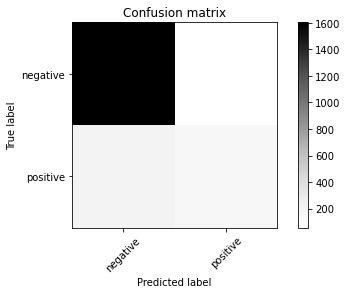

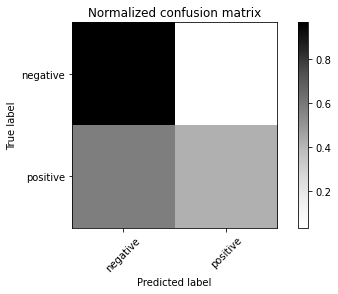

In [11]:
#LSTM 

data = pd.read_csv('f-data.csv')  

data=data[data.Sentiment !=0]
print(data.Sentiment.value_counts())

#Embedding
max_features=1000
maxlen=100
embedding_size=128

#Convolution
kernel_size=5
filters=64
pool_size=4

lstm_output_size=70

batch_size=30
epochs=2

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
tokenizer=Tokenizer(nb_words=max_features,split=' ')
tokenizer.fit_on_texts(data['tweet'].values)
X=tokenizer.texts_to_sequences(data['tweet'].values)
X=pad_sequences(X, maxlen = maxlen)

Y=pd.get_dummies(data['Sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
plot_losses = PlotLosses()

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(X_test, Y_test),callbacks=[plot_losses],verbose = 0)

yhat = model.predict(X_test, verbose = 2, batch_size = batch_size)

from sklearn import metrics
print(metrics.classification_report(Y_test[:,1], np.round(yhat[:,1]) ,target_names = ["negative", "positive"]))

score = ['negative', 'positive']

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greys):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(score)))
    plt.xticks(tick_marks, score, rotation=45)
    plt.yticks(tick_marks, score)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(Y_test[:,1], np.round(yhat[:,1]))
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
